In [22]:
import warnings 
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import imdb
from keras.datasets import reuters
from keras import layers
from keras import models
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

# IMDB 


In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
word_index = imdb.get_word_index()

In [5]:
reverse_word_index = {value: key for (key, value) in word_index.items()}

In [6]:
reverse_word_index = dict(sorted(reverse_word_index.items(), key=lambda item: item[0]))
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for index, sequence in enumerate(sequences):
        result[index, sequence] = 1.
    return result

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
y_train = np.asarray(train_labels, dtype=np.float32)
y_test = np.asarray(test_labels, dtype=np.float32)

In [10]:
x_val = x_train[:10000]
x_train_new = x_train[10000:]
y_val = y_train[:10000]
y_train_new = y_train[10000:]

In [11]:
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new, validation_data=(x_val, y_val), epochs=20, batch_size=512)

2021-08-30 07:43:55.469211: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-30 07:43:55.469987: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.5170 - accuracy: 0.7765 - val_loss: 0.3995 - val_accuracy: 0.8533
Epoch 2/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.3042 - accuracy: 0.9053 - val_loss: 0.3072 - val_accuracy: 0.8859
Epoch 3/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.2229 - accuracy: 0.9271 - val_loss: 0.2830 - val_accuracy: 0.8889
Epoch 4/20
15000/15000 [==============================] - 1s 55us/step - loss: 0.1748 - accuracy: 0.9447 - val_loss: 0.2746 - val_accuracy: 0.8897
Epoch 5/20
15000/15000 [==============================] - 1s 41us/step - loss: 0.1441 - accuracy: 0.9537 - val_loss: 0.2903 - val_accuracy: 0.8846
Epoch 6/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.1229 - accuracy: 0.9606 - val_loss: 0.2933 - val_accuracy: 0.8864
Epoch 7/20
15000/15000 [==============================] - 1s 49us/s

In [73]:
def plot_loss(history):
    epoch = history.epoch
    val_loss = history.history['val_loss']
    train_loss = history.history['loss']

    plt.plot(epoch, val_loss, 'b--', label='Val_loss')
    plt.plot(epoch, train_loss, 'b', label='Train_loss')
    plt.xlabel('Epoch', family='serif')
    plt.ylabel('Loss', family='serif')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [13]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [76]:
def plot_acccuracy(history):
    epoch = history.epoch
    val_acc = history.history['val_accuracy']
    train_acc = history.history['accuracy']

    plt.plot(epoch, val_acc, 'b--', label='Val_acc')
    plt.plot(epoch, train_acc, 'b', label='Train_acc')
    plt.xlabel('Epoch', family='serif')
    plt.ylabel('Accuracy', family='serif')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [15]:
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new, validation_data=(x_val, y_val), epochs=4, batch_size=512)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 90us/step - loss: 0.5241 - accuracy: 0.7841 - val_loss: 0.3931 - val_accuracy: 0.8717
Epoch 2/4
15000/15000 [==============================] - 1s 52us/step - loss: 0.3107 - accuracy: 0.9034 - val_loss: 0.3127 - val_accuracy: 0.8817
Epoch 3/4
15000/15000 [==============================] - 1s 48us/step - loss: 0.2287 - accuracy: 0.9243 - val_loss: 0.2828 - val_accuracy: 0.8899
Epoch 4/4
15000/15000 [==============================] - 1s 51us/step - loss: 0.1772 - accuracy: 0.9436 - val_loss: 0.2770 - val_accuracy: 0.8897


In [16]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 69us/step


[0.2986239148712158, 0.8799200057983398]

# Reuters Datasets

In [17]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 7s 3us/step


In [19]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [43]:
def to_one_hot(labels, dimension=46):
    result = np.zeros((len(labels), dimension), dtype=np.float32)
    for index, label in enumerate(labels):
        result[index, label] = 1.
    return result

In [44]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [55]:
x_val = x_train[:1000]
x_train_new = x_train[1000:]
y_val = y_train[:1000]
y_train_new = y_train[1000:]

In [57]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10000,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new, epochs=20, batch_size=512, validation_data=(x_val, y_val))

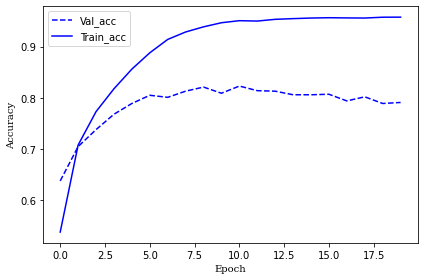

In [79]:
plot_acccuracy(history)

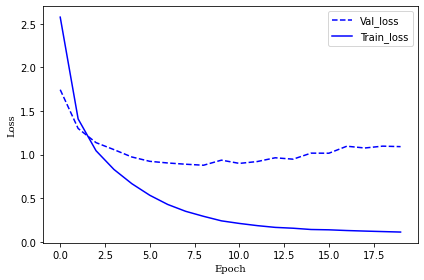

In [78]:
plot_loss(history)

In [100]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10000,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 125us/step - loss: 2.6687 - accuracy: 0.5227 - val_loss: 1.7645 - val_accuracy: 0.6280
Epoch 2/9
7982/7982 [==============================] - 0s 56us/step - loss: 1.4327 - accuracy: 0.7035 - val_loss: 1.3081 - val_accuracy: 0.7080
Epoch 3/9
7982/7982 [==============================] - 0s 54us/step - loss: 1.0384 - accuracy: 0.7844 - val_loss: 1.1262 - val_accuracy: 0.7700
Epoch 4/9
7982/7982 [==============================] - 0s 54us/step - loss: 0.8106 - accuracy: 0.8292 - val_loss: 1.0410 - val_accuracy: 0.7900
Epoch 5/9
7982/7982 [==============================] - 0s 55us/step - loss: 0.6453 - accuracy: 0.8658 - val_loss: 0.9632 - val_accuracy: 0.7990
Epoch 6/9
7982/7982 [==============================] - 0s 56us/step - loss: 0.5085 - accuracy: 0.8928 - val_loss: 0.9285 - val_accuracy: 0.8090
Epoch 7/9
7982/7982 [==============================] - 0s 58us/step - loss: 0.4133 - ac

In [101]:
model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 127us/step


[0.9862505669903776, 0.7867319583892822]

# House Prices

In [102]:
from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 5us/step


In [106]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [107]:
def build_model():
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [121]:
k_fold = 4
num_val_samples = len(train_data) // 4
epochs = 500
all_scores = []
for i in range(k_fold):
    print(f'Processing Fold {i + 1} ...')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate((train_data[: i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]), axis=0)
    partial_train_labels = np.concatenate((train_labels[: i * num_val_samples],
                                         train_labels[(i + 1) * num_val_samples:]), axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_labels, epochs=epochs,
              validation_data=(val_data, val_labels), batch_size=1, verbose=0)
    all_scores.append(history.history['val_mae'])

Processing Fold 1 ...
Processing Fold 2 ...
Processing Fold 3 ...
Processing Fold 4 ...


In [142]:
average_mae_fold = [np.mean([mae[epoch] for mae in all_scores]) for epoch in range(epochs)]
np.mean(average_mae_fold)

2.565851766884327